# Import Packages

In [1]:

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['Aloevera','ashoka','Bringaraja','Coriender','Curry Leaves',
               'Eucalyptus','Henna','Hibiscus','Neem','Tulasi']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [3]:
def load_data():

    datasets = ['C:/Users/penna/OneDrive/Desktop/Major Project/source code/New Final/final-Medicinal-Stanley/train','C:/Users/penna/OneDrive/Desktop/Major Project/source code/New Final/final-Medicinal-Stanley/test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
def suggestions1():
    if (pred_labels==0):
        print("USES:-treat skin problems (burns, wounds, and anti-inflammatory processes)")
        print("DRY-STATE-USES:-Aloevera in dry state can be used in the form of fine powder to treat the problems such as  alleviating dry skin, minor cuts, wounds and can also be used for skin treatments. Aloe vera is believed to have oral health benefits, we can use the dry leaf powder to create a mouthwash or toothpaste by mixing it with water or baking soda. This can help freshen breath, reduce plaque buildup, and soothe gum inflammation.")    
    elif (pred_labels==1):
        print("USES:-Ashoka helps to gynecological and menstrual problems,irregular periods")
        print("DRY-STATE-USES:-Ashoka leaves in dry state can be used to make a tea which helps to regulate menstrual cycles, reduce heavy bleeding, and alleviate menstrual pain. This tea can be taken regularly to support overall reproductive health. Drinking Ashoka leaf tea can help improve digestion, reduce bloating, and alleviate constipation. Ashoka leaf powder mixed with water can be used for pain relief ")
    elif (pred_labels==2):
        print("USES:-hair fall, dandruff, premature graying, and also strengthen hair")
        print("DRY-STATE-USES:-Bringaraja leaves in dry state can be used in making hair oil as it  promotes hair growth, reduce hair fall, and prevent premature greying, and can also be used as hair mask for strengthening hair roots and adding shine. Drinking Bhringraj tea can aid in detoxification, improve liver function, and support overall health.")      
    elif (pred_labels==3):
        print("USES:-boost your immunity,ease digestion, aids blood sugar levels")
        print("DRY-STATE-USES:-Digestive Aid, Anti-inflammatory, Cholesterol Management, Blood Sugar Control, Antibacterial Properties")
    elif (pred_labels==4):
        print("USES:-It helps in the treatment of diarrhea, diabetes, morning sickness")
        print("DRY-STATE-USES:-Digestive Health, Diabetes Management, Hair Health, Eye Health, Liver Health")
    elif (pred_labels==5):
        print("USES:-eucalyptus steam to help treat bronchitis, coughs")
        print("DRY-STATE-USES:-eucalyptus in dry state can be used for Steam Inhalation that helps to relieve congestion, coughs, and sinus infections. These leaves in potpourri blends to create a fresh aroma in the home. Infuse a coconut oil or olive oil with dried eucalyptus leaves to create a massage oil that can help relieve muscle and joint pain.")
    elif (pred_labels==6):
        print("USES:-applied directly to the affected area for dandruff,fungal infections")
        print("DRY-STATE-USES:-Henna leaves in dry state can be used in form of powder to make a hair dye that gives hair a natural reddish-brown color and also conditions and strengthens it. Mix henna powder with neem powder and water to make a paste. Apply it to the scalp to help with scalp infections and soothe irritation. These leaves also contain natural antifungal and antibacterial properties, making them useful for treating skin disorders such as athlete's foot, ringworm, and eczema. ")
    elif (pred_labels==7):
        print("USES:-treat ailments such as liver problems and high blood pressure")
        print("DRY-STATE-USES:-Hibiscus in dry state can be used in making tea as hibiscus tea is rich in antioxidants, can help lower blood pressure, and may support heart health, this tea can also help boost the immune system and protect against common colds and infections as it is rich in vitamin C. These leaves can be also used as hair mask that helps in strengthen hair, reduce hair fall, treat scalp issues, and  Natural Dye for fabrics")
    elif (pred_labels==8):
        print("USES:-various skin problems like acne, pimples, skin rashes and skin allergies")
        print("DRY-STATE-USES:-Neem leaves have been traditionally used internally for their medicinal properties. Sprinkle dried neem powder around your garden or plants to act as a natural pesticide and keep pests away. Add dried neem leaves to your bathwater for a relaxing and detoxifying soak that can help soothe skin irritations and infections. ")
    else:
        print("USES:- hand sanitizer, mouthwash and water purifier as well as in animal rearing, wound healing, the preservation of food stuffs and herbal raw materials and traveler's health.")
        print("DRY-STATE-USES:-Tulasi leaves in dry state can be used in making herbal tea that can help reduce stress, improve immunity, and aid digestion. Boil dried Tulsi leaves in water and inhale the steam to help relieve respiratory issues such as colds, coughs, and asthma.")

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/penna/OneDrive/Desktop/Major Project/source code/New Final/final-Medicinal-Stanley/train


100%|██████████| 60/60 [00:01<00:00, 37.99it/s]


Loading C:/Users/penna/OneDrive/Desktop/Major Project/source code/New Final/final-Medicinal-Stanley/test


100%|██████████| 12/12 [00:00<00:00, 45.94it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 600
Number of testing examples: 120
Each image is of size: (150, 150)


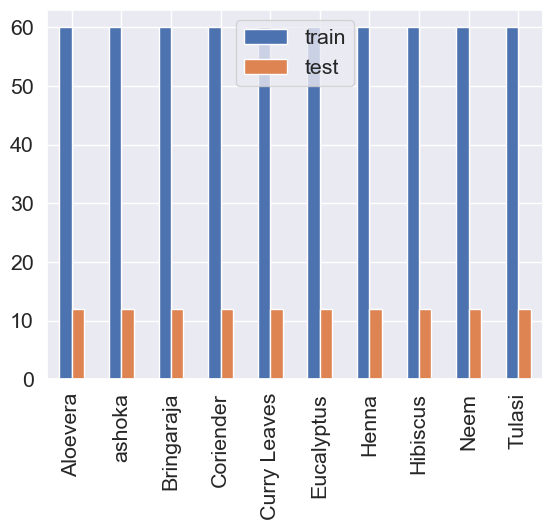

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

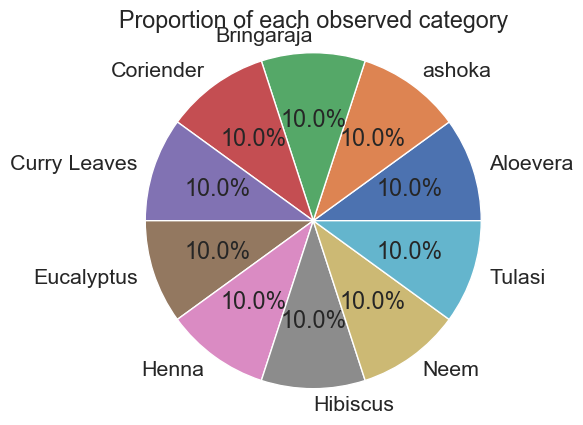

In [9]:
plt.pie(train_counts,
        explode=(0,0,0,0,0,0,0,0,0,0,) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [11]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

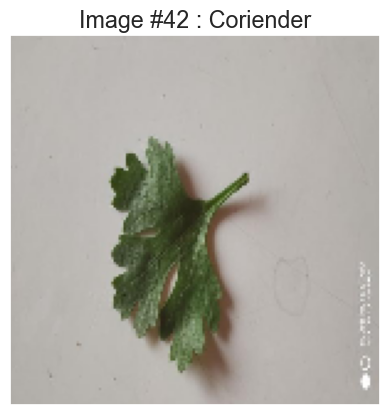

In [12]:
display_random_image(class_names, train_images, train_labels)

In [13]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with its corresponding labels
    """
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()


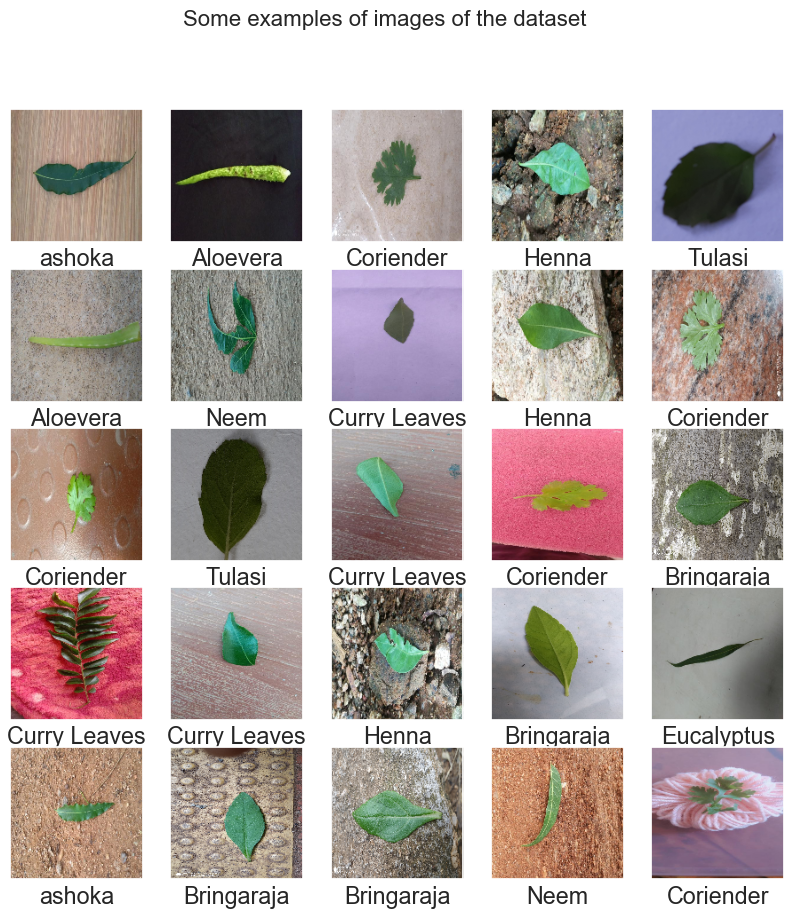

In [14]:
display_examples(class_names, train_images, train_labels)

# CNN

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30


4/4 [==============================] - 11s 2s/step - loss: 5.2844 - accuracy: 0.1021 - val_loss: 3.0452 - val_accuracy: 0.0750
Epoch 2/30
4/4 [==============================] - 8s 2s/step - loss: 2.4858 - accuracy: 0.2021 - val_loss: 2.2677 - val_accuracy: 0.2167
Epoch 3/30
4/4 [==============================] - 8s 2s/step - loss: 2.2008 - accuracy: 0.2125 - val_loss: 2.3194 - val_accuracy: 0.0917
Epoch 4/30
4/4 [==============================] - 8s 2s/step - loss: 2.1108 - accuracy: 0.2479 - val_loss: 2.0557 - val_accuracy: 0.2917
Epoch 5/30
4/4 [==============================] - 8s 2s/step - loss: 1.9612 - accuracy: 0.3708 - val_loss: 1.9966 - val_accuracy: 0.2583
Epoch 6/30
4/4 [==============================] - 8s 2s/step - loss: 1.8210 - accuracy: 0.4146 - val_loss: 1.8262 - val_accuracy: 0.3000
Epoch 7/30
4/4 [==============================] - 7s 2s/step - loss: 1.6018 - accuracy: 0.4979 - val_loss: 1.7586 - val_accuracy: 0.4083
Epoch 8/30
4/4 [======================

In [18]:
test_loss = model.evaluate(test_images, test_labels)

4/4 [==============================] - 1s 109ms/step - loss: 0.0716 - accuracy: 0.9833


In [19]:
####resnet
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(150,150, 3))

In [20]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(13, activation='softmax')(x)
model2 = Model(ResNet_model.input, output)


model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 77, 77, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 38, 38, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 38, 38, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 38, 38, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv3_block2_1_relu (Activ  (None, 19, 19, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 21, 21, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 19, 19, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 19, 19, 128)          512       ['conv3_block2_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv3_block4_out (Add)      (None, 19, 19, 512)          0         ['conv3_block3_out[0][0]',    
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv3_block5_preact_bn (Ba  (None, 19, 19, 512)          2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv3_block5_preact_relu (  (None, 19, 19, 512)          0         ['conv3_block5_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv3_blo

 ation)                                                                                           
                                                                                                  
 conv3_block7_2_pad (ZeroPa  (None, 21, 21, 128)          0         ['conv3_block7_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block7_2_conv (Conv2  (None, 19, 19, 128)          147456    ['conv3_block7_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block7_2_bn (BatchNo  (None, 19, 19, 128)          512       ['conv3_block7_2_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv4_block1_0_conv (Conv2  (None, 10, 10, 1024)         525312    ['conv4_block1_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv4_block1_3_conv (Conv2  (None, 10, 10, 1024)         263168    ['conv4_block1_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_out (Add)      (None, 10, 10, 1024)         0         ['conv4_block1_0_conv[0][0]', 
                                                                     'conv4_block1_3_conv[0][0]'] 
                                                                                                  
 conv4_block2_preact_bn (Ba  (None, 10, 10, 1024)         4096      ['conv4_block1_out[0][0]']    
 tchNormal

                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block4_1_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block4_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block4_2_pad (ZeroPa  (None, 12, 12, 256)          0         ['conv4_block4_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv4_blo

 ation)                                                                                           
                                                                                                  
 conv4_block6_3_conv (Conv2  (None, 10, 10, 1024)         263168    ['conv4_block6_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block6_out (Add)      (None, 10, 10, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_conv[0][0]'] 
                                                                                                  
 conv4_block7_preact_bn (Ba  (None, 10, 10, 1024)         4096      ['conv4_block6_out[0][0]']    
 tchNormalization)                                                                                
          

 conv4_block9_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_1_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block9_2_pad (ZeroPa  (None, 12, 12, 256)          0         ['conv4_block9_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv4_block9_2_conv (Conv2  (None, 10, 10, 256)          589824    ['conv4_block9_2_pad[0][0]']  
 D)       

                                                                                                  
 conv4_block11_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block11_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block11_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block10_out[0][0]',   
                                                                     'conv4_block11_3_conv[0][0]']
                                                                                                  
 conv4_block12_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block11_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_blo

 ormalization)                                                                                    
                                                                                                  
 conv4_block14_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block14_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block14_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block14_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block14_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block14_2_pad[0][0]'] 
 2D)                                                                                              
          

 conv4_block16_3_conv (Conv  (None, 10, 10, 1024)         263168    ['conv4_block16_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block15_out[0][0]',   
                                                                     'conv4_block16_3_conv[0][0]']
                                                                                                  
 conv4_block17_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block16_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block17_preact_relu   (None, 10, 10, 1024)         0         ['conv4_block17_preact_bn[0][0
 (Activati

                                                                                                  
 conv4_block19_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block19_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block19_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block19_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block19_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block21_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block20_out[0][0]',   
                                                                     'conv4_block21_3_conv[0][0]']
                                                                                                  
 conv4_block22_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block21_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block22_preact_relu   (None, 10, 10, 1024)         0         ['conv4_block22_preact_bn[0][0
 (Activation)                                                       ]']                           
          

 conv4_block24_1_relu (Acti  (None, 10, 10, 256)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block24_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block24_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_block24_2_bn (BatchN  (None, 10, 10, 256)          1024      ['conv4_block24_2_conv[0][0]']
 ormalizat

                                                                                                  
 conv4_block26_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block25_out[0][0]',   
                                                                     'conv4_block26_3_conv[0][0]']
                                                                                                  
 conv4_block27_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block26_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block27_preact_relu   (None, 10, 10, 1024)         0         ['conv4_block27_preact_bn[0][0
 (Activation)                                                       ]']                           
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block29_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block29_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block29_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block29_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_block29_2_bn (BatchN  (None, 10, 10, 256)          1024      ['conv4_block29_2_conv[0][0]']
 ormalization)                                                                                    
          

 conv4_block31_out (Add)     (None, 10, 10, 1024)         0         ['conv4_block30_out[0][0]',   
                                                                     'conv4_block31_3_conv[0][0]']
                                                                                                  
 conv4_block32_preact_bn (B  (None, 10, 10, 1024)         4096      ['conv4_block31_out[0][0]']   
 atchNormalization)                                                                               
                                                                                                  
 conv4_block32_preact_relu   (None, 10, 10, 1024)         0         ['conv4_block32_preact_bn[0][0
 (Activation)                                                       ]']                           
                                                                                                  
 conv4_block32_1_conv (Conv  (None, 10, 10, 256)          262144    ['conv4_block32_preact_relu[0]
 2D)      

                                                                                                  
 conv4_block34_2_pad (ZeroP  (None, 12, 12, 256)          0         ['conv4_block34_1_relu[0][0]']
 adding2D)                                                                                        
                                                                                                  
 conv4_block34_2_conv (Conv  (None, 10, 10, 256)          589824    ['conv4_block34_2_pad[0][0]'] 
 2D)                                                                                              
                                                                                                  
 conv4_block34_2_bn (BatchN  (None, 10, 10, 256)          1024      ['conv4_block34_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block36_out (Add)     (None, 5, 5, 1024)           0         ['max_pooling2d_4[0][0]',     
                                                                     'conv4_block36_3_conv[0][0]']
                                                                                                  
 conv5_block1_preact_bn (Ba  (None, 5, 5, 1024)           4096      ['conv4_block36_out[0][0]']   
 tchNormalization)                                                                                
                                                                                                  
 conv5_block1_preact_relu (  (None, 5, 5, 1024)           0         ['conv5_block1_preact_bn[0][0]
 Activation)                                                        ']                            
          

 conv5_block3_1_bn (BatchNo  (None, 5, 5, 512)            2048      ['conv5_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_1_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_pad (ZeroPa  (None, 7, 7, 512)            0         ['conv5_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 5, 5, 512)            2359296   ['conv5_block3_2_pad[0][0]']  
 D)       

In [21]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model2.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Epoch 1/5
4/4 [==============================] - 161s 38s/step - loss: 2.0632 - accuracy: 0.3708 - val_loss: 1.0505 - val_accuracy: 0.6500
Epoch 2/5
4/4 [==============================] - 139s 37s/step - loss: 0.4101 - accuracy: 0.9229 - val_loss: 1.5185 - val_accuracy: 0.8083
Epoch 3/5
4/4 [==============================] - 137s 36s/step - loss: 0.0585 - accuracy: 0.9875 - val_loss: 1.6755 - val_accuracy: 0.8500
Epoch 4/5
4/4 [==============================] - 143s 37s/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 2.3715 - val_accuracy: 0.8583
Epoch 5/5
4/4 [==============================] - 140s 37s/step - loss: 0.0044 - accuracy: 0.9979 - val_loss: 3.0632 - val_accuracy: 0.8500


In [23]:
test_loss = model2.evaluate(test_images, test_labels)

4/4 [==============================] - 27s 7s/step - loss: 0.2811 - accuracy: 0.9750


In [24]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Define the dimensions of your input images
height = 150
width = 150
channels = 3

# Define the input tensor
input_tensor = Input(shape=(height, width, channels))

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Flatten the output of VGG16
flatten = Flatten()(base_model.output)

# Add a dense layer with some neurons
output = Dense(10, activation='softmax')(flatten)

# Create a new model
model3 = Model(inputs=base_model.input, outputs=output)

# Set all layers as non-trainable initially
for layer in model3.layers:
    layer.trainable = False

# Make the last few layers trainable
for layer in model3.layers[-16:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)


Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten_2' is trainable
Layer 'dense_5' is trainable


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_disease.h5.keras", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [26]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

opt = Adam(learning_rate=0.001)  # Use learning_rate instead of lr
model3.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model3.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [27]:
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
import tensorflow as tf

# Resize images to match the model's input shape
train_images_resized = tf.image.resize(train_images, (150, 150))

# Now, you can use train_images_resized as input to your model
history = model3.fit(train_images_resized, train_labels, batch_size=128, epochs=5, validation_split=0.2)


Epoch 1/5
4/4 [==============================] - 386s 95s/step - loss: 3.1322 - accuracy: 0.1083 - val_loss: 2.3006 - val_accuracy: 0.1000
Epoch 2/5
4/4 [==============================] - 365s 91s/step - loss: 2.4704 - accuracy: 0.0958 - val_loss: 2.2961 - val_accuracy: 0.1667
Epoch 3/5
4/4 [==============================] - 374s 95s/step - loss: 2.3154 - accuracy: 0.1229 - val_loss: 2.2925 - val_accuracy: 0.1083
Epoch 4/5
4/4 [==============================] - 381s 96s/step - loss: 2.2920 - accuracy: 0.1250 - val_loss: 2.2841 - val_accuracy: 0.2083
Epoch 5/5
4/4 [==============================] - 388s 99s/step - loss: 2.2748 - accuracy: 0.1500 - val_loss: 2.2657 - val_accuracy: 0.1833


In [29]:
test_loss = model3.evaluate(test_images, test_labels)

4/4 [==============================] - 32s 8s/step - loss: 2.2487 - accuracy: 0.1667


1/1 [==============================] - 1s 538ms/step
USES:-boost your immunity,ease digestion, aids blood sugar levels
DRY-STATE-USES:-Digestive Aid, Anti-inflammatory, Cholesterol Management, Blood Sugar Control, Antibacterial Properties
[3]


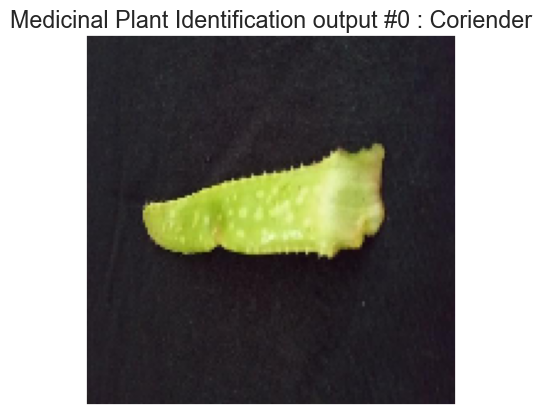

In [30]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/penna/OneDrive/Desktop/Major Project/source code/New Final/final-Medicinal-Stanley/test/Aloevera/503.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
suggestions1()
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Medicinal Plant Identification output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

4/4 [==============================] - 0s 106ms/step


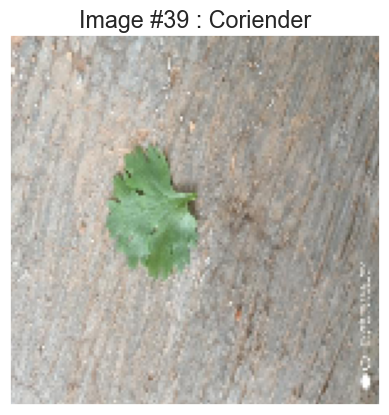

In [31]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

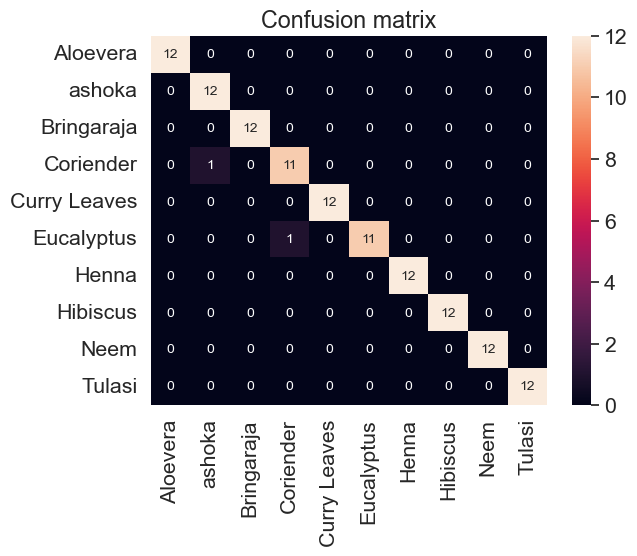

In [32]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [33]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming CM is your confusion matrix, and you have class_names defined

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(test_labels, pred_labels, average='weighted')
overall_recall = recall_score(test_labels, pred_labels, average='weighted')
overall_f1 = f1_score(test_labels, pred_labels, average='weighted')

# Calculate custom accuracy
custom_accuracy = accuracy_score(test_labels, pred_labels)

print(f'Precision: {overall_precision}')
print(f'Recall: {overall_recall}')
print(f'F1 Score: {overall_f1}')
print(f'Custom Accuracy: {custom_accuracy}')

Precision: 0.983974358974359
Recall: 0.9833333333333333
F1 Score: 0.9833188405797102
Custom Accuracy: 0.9833333333333333


In [34]:
# Generate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    Aloevera       1.00      1.00      1.00        12
      ashoka       0.92      1.00      0.96        12
  Bringaraja       1.00      1.00      1.00        12
   Coriender       0.92      0.92      0.92        12
Curry Leaves       1.00      1.00      1.00        12
  Eucalyptus       1.00      0.92      0.96        12
       Henna       1.00      1.00      1.00        12
    Hibiscus       1.00      1.00      1.00        12
        Neem       1.00      1.00      1.00        12
      Tulasi       1.00      1.00      1.00        12

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



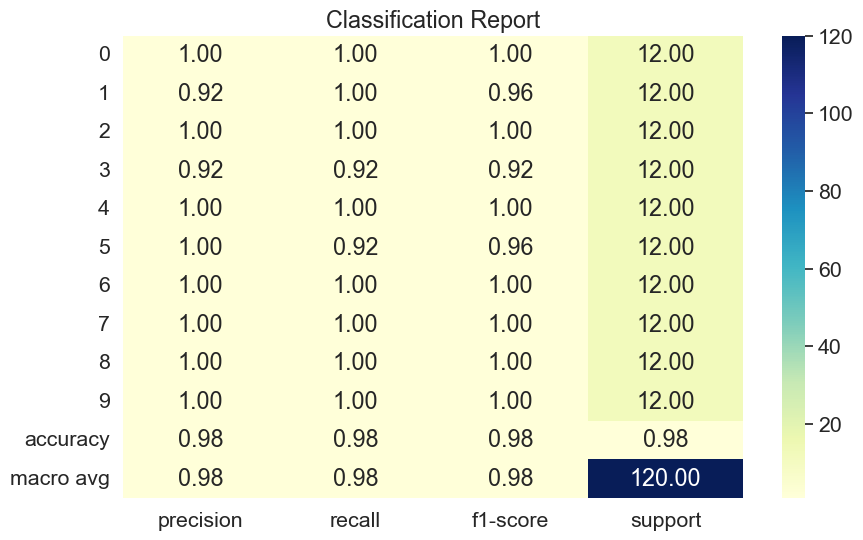

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()

In [36]:
model.save_weights("model_vgg.weights.h5")
print("Saved model to disk")

Saved model to disk


In [37]:
model_json=model.to_json()
with open("model_vgg.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_vgg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ['Aloevera','ashoka','Bringaraja','Coriender','Curry Leaves',
                   'Eucalyptus','Henna','Hibiscus','Neem','Tulasi']
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [11/Jun/2024 11:54:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 11:54:33] "GET /static/script.js HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 11:54:33] "GET /static/images/download.jpeg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 11:54:38] "GET /static/images/bg.jpeg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 11:54:51] "GET /favicon.ico HTTP/1.1" 404 -


uploads\502.jpg
1/1 [==============================] - 0s 67ms/step


127.0.0.1 - - [11/Jun/2024 11:54:53] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 11:54:53] "GET /classify/502.jpg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 11:54:53] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 11:54:53] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


[2.5183078e-09 3.7467299e-10 4.6356416e-09 7.3313591e-11 3.8522847e-09
 6.6065668e-06 1.4727508e-09 5.1218985e-09 1.0695098e-06 9.9999237e-01]


127.0.0.1 - - [11/Jun/2024 13:50:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 13:50:49] "GET /static/images/download.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 13:50:49] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 13:50:49] "GET /static/images/bg.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:25:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:25:19] "GET /static/images/download.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:25:19] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:25:19] "GET /static/images/bg.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:38:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:38:30] "GET /static/images/download.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:38:30] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:38:30] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


uploads\502.jpg
1/1 [==============================] - 0s 34ms/step


127.0.0.1 - - [11/Jun/2024 14:38:42] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:38:42] "GET /classify/502.jpg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:38:42] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:38:42] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


[2.5183078e-09 3.7467299e-10 4.6356416e-09 7.3313591e-11 3.8522847e-09
 6.6065668e-06 1.4727508e-09 5.1218985e-09 1.0695098e-06 9.9999237e-01]


127.0.0.1 - - [11/Jun/2024 14:39:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:39:32] "GET /static/images/download.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:39:32] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:39:32] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


uploads\502.jpg
1/1 [==============================] - 0s 36ms/step


127.0.0.1 - - [11/Jun/2024 14:39:43] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:39:43] "GET /classify/502.jpg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:39:43] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:39:43] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


[9.9999607e-01 1.1913872e-13 4.3099231e-08 1.5701027e-06 6.0578934e-13
 6.3922162e-12 3.0633643e-07 1.4067444e-11 1.8820671e-06 4.8508344e-08]


127.0.0.1 - - [11/Jun/2024 14:41:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:41:12] "GET /static/images/download.jpeg HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:41:12] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:41:12] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


uploads\502.jpg
1/1 [==============================] - 0s 30ms/step


127.0.0.1 - - [11/Jun/2024 14:41:33] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:41:33] "GET /classify/502.jpg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 14:41:33] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 14:41:33] "GET /static/images/bg.jpeg HTTP/1.1" 304 -


[9.5163910e-03 9.7644413e-01 7.0836893e-03 2.4928262e-03 2.2754483e-03
 7.5789781e-06 1.9071675e-03 6.4631549e-06 2.6633756e-04 4.7674814e-10]
